# Lab 2: More ggplot and dplyr



In [14]:
options(repr.plot.width=8, repr.plot.height=4)
library(tidyverse)

In [15]:
# Sample 1200 rows
set.seed(306)
rand_idx = sample(1:nrow(diamonds), 1200)
dm = diamonds[rand_idx, ]
dim(dm)
head(dm)

[1] 1200   10

carat,cut,color,clarity,depth,table,price,x,y,z
1.63,Premium,I,SI1,61.7,58,9730,7.54,7.51,4.64
1.06,Ideal,G,VS1,61.1,57,8285,6.54,6.61,4.02
0.52,Premium,G,VS1,61.7,56,1815,5.21,5.17,3.20
0.33,Ideal,E,VVS1,61.6,55,1130,4.44,4.46,2.74
0.50,Good,F,VS2,58.8,64,1433,5.21,5.16,3.05
0.24,Very Good,E,SI1,59.9,58,571,4.06,4.10,2.44


# ggplot

## Geometric objects
So far we have plotted the points in a fundamental manner. We might be interested in the linear trends of the data that we have.

`geom_smooth()` using method = 'gam'


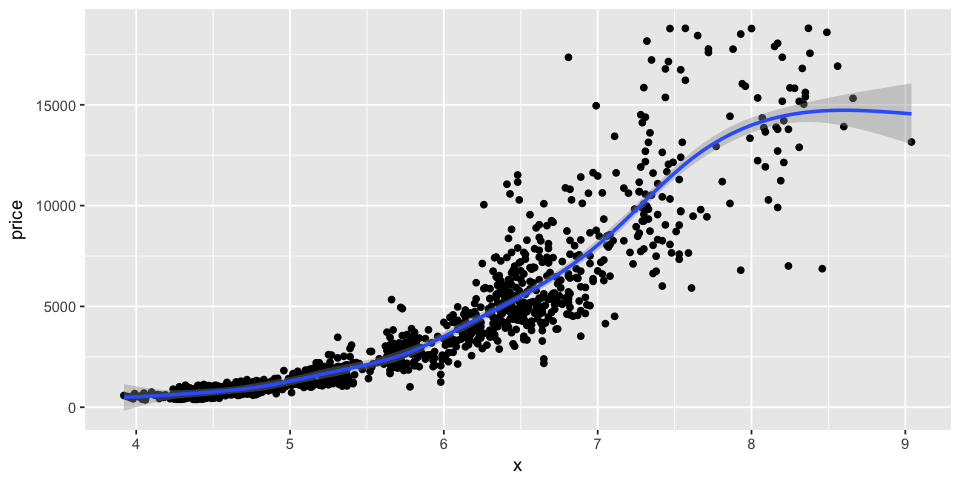

In [16]:
ggplot(data=dm, aes(x=x, y=price)) +
    geom_point() +
    geom_smooth()

# ggplot(data=dm) +
#     geom_point(aes(x=x, y=price)) +
#     geom_smooth(aes(x=x, y=price))

### Exercise:

1. Notice the warning that "`geom_smooth()` using method = 'gam'". Look up the [documentation](https://ggplot2.tidyverse.org/reference/geom_smooth.html). What other methods can be used? Try a different method, do you see any differences?
2. Try making separate plots with the smoothing line for each value of the `cut` variable. Remember faceting. What method does `geom_smooth` use by default now? Why?

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


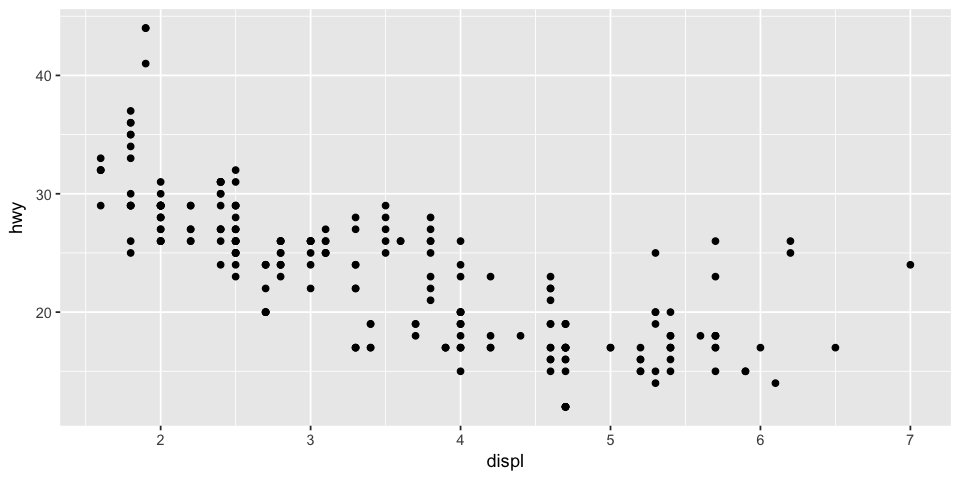

In [17]:
head(mpg)
ggplot(data=mpg, aes(x=displ, y=hwy)) + 
    geom_point()

`geom_smooth()` using method = 'loess'


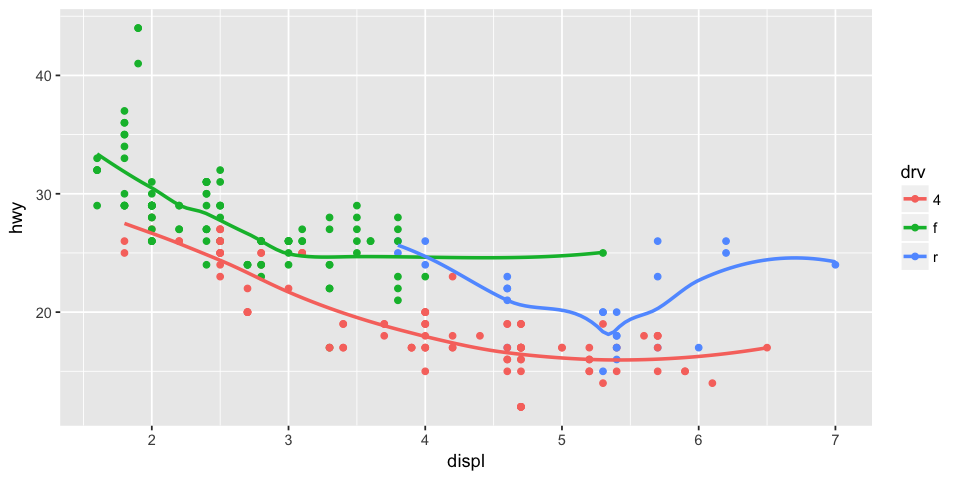

In [18]:
ggplot(data=mpg, aes(x=displ, y=hwy, color=drv)) + 
    geom_point() + 
    geom_smooth(se=FALSE)

## Statistical transformations
Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values to plot.

You can learn which stat a geom uses by inspecting the default value for the `stat` argument. For example, `geom_bar`'s default value for stat is `'count'`, which means that `geom_bar()` uses `stat_count()`.

`stat_count` is documented on the same page as `geom_bar`, and if you scroll down you can find a section called "Computed Variables." Here we can see that `stat_count` computes two extra variables: `count` and `prop`.

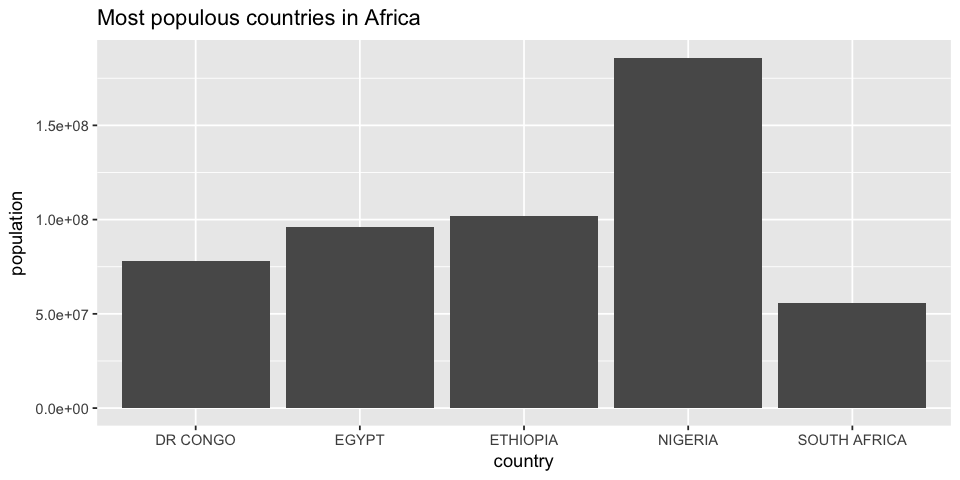

In [19]:
popn <- tribble(
~country, ~population,
"ETHIOPIA", 102000000,
"NIGERIA", 186000000,
"EGYPT", 96000000,
"DR CONGO", 78000000,
"SOUTH AFRICA", 56000000
)

ggplot(data = popn, aes(x=country, y=population)) +
  geom_bar(stat='identity') +   # Could use geom_col() instead
  ggtitle('Most populous countries in Africa')

### Exercise:

1. Which of the following commands will work? What will it plot? Why? Hint: Recall the default `stat` for `geom_bar`.

Recall that `stat_count` computes two values, `count` and `prop`. By default `count` is plotted, but we can plot other ones if we want to.

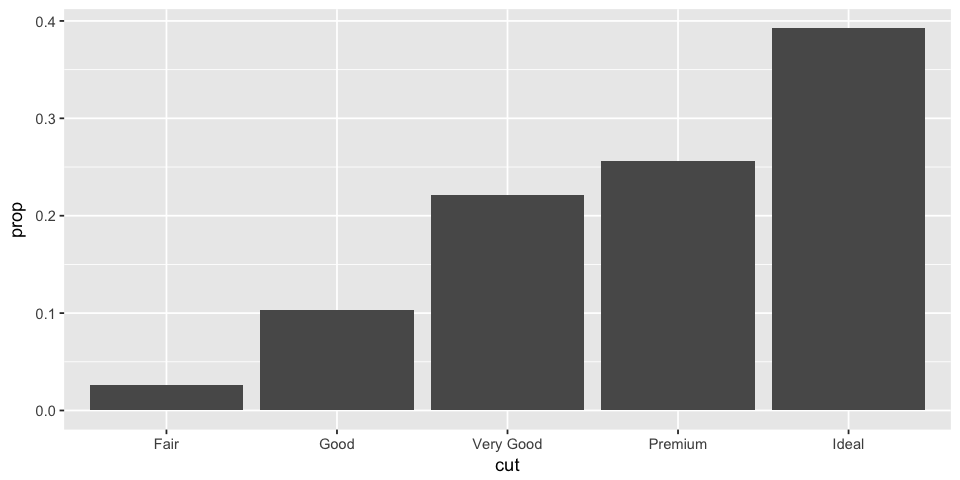

In [20]:
ggplot(data=dm, aes(x=cut)) + 
    geom_bar(aes(y=..prop.., group=1))

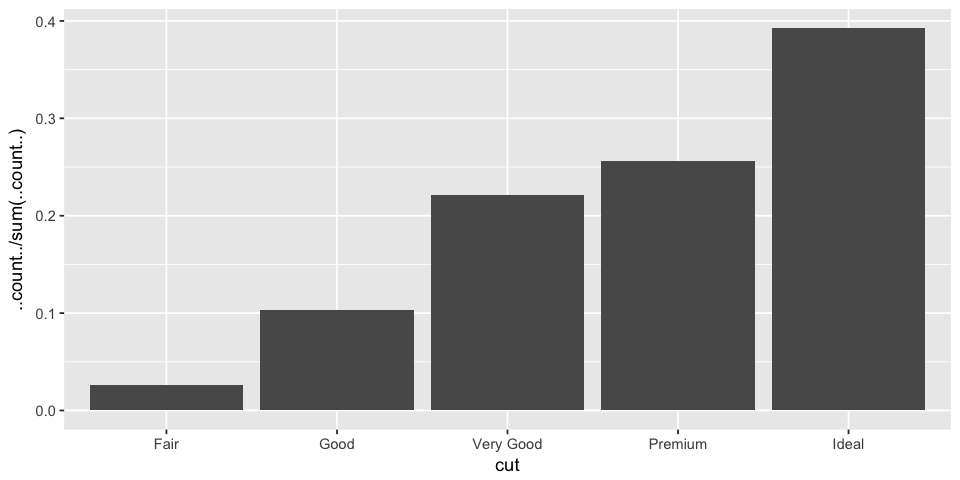

In [21]:
ggplot(data=dm, aes(x=cut)) + 
    geom_bar(aes(y=..count../sum(..count..)))

### Exercise:
1. What happens if you omit the `group=1` aesthetic in the first command above? Why?
2. Why don't we need the `group=1` aesthetic in the second command?

Other times, you want to apply your own stat functions to the data. For this, you can use `stat_summary()` to apply any summary function, including custom-made ones, to the data for each `x` value.

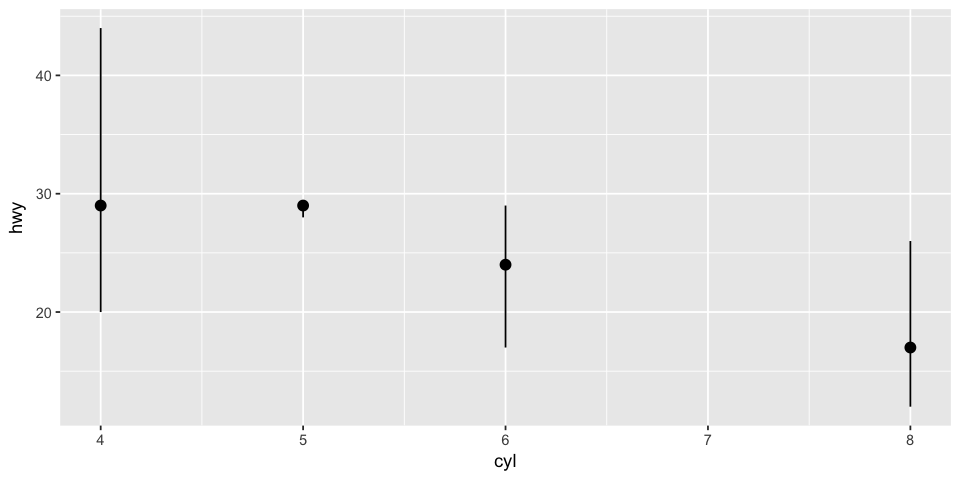

In [22]:
ggplot(mpg, aes(x=cyl, y=hwy)) +
    stat_summary(
        fun.ymin=min,
        fun.ymax=max,
        fun.y=median
    )

### Exercise
1. What is the default geom associated with `stat_summary()`? Can you modify the above code to make a line plot of the median `hwy` by `cyl`? Note that you don't need the `fun.ymax` and `fun.ymin` arguments.


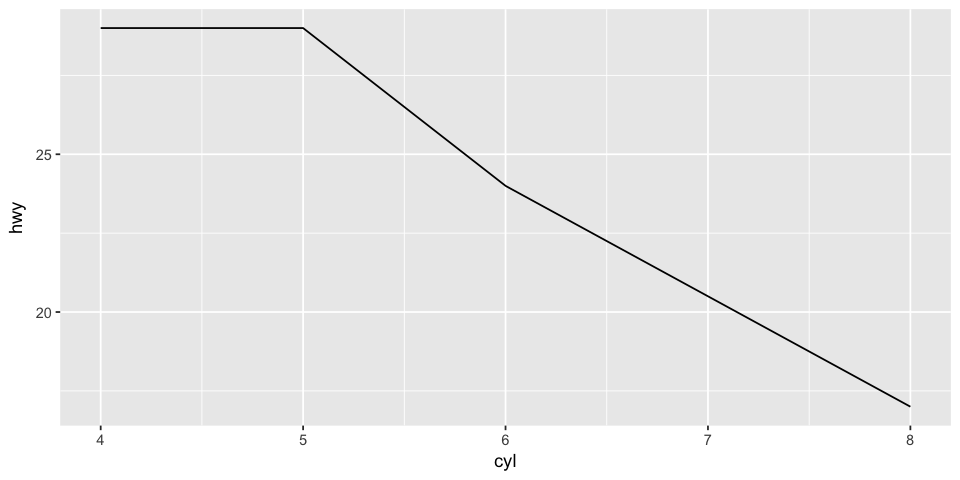

In [23]:
ggplot(mpg, aes(x=cyl, y=hwy)) +
    stat_summary(fun.y=median, geom='line')

## Position adjustments

Some geom commands take positional arguments that can be used to modify the positioning of the elements. For instance, when given a `fill` aesthetic `geom_bar` be default stacks the bars for each unique value of the `x` aesthetic. This corresponds to `position='stack'`.

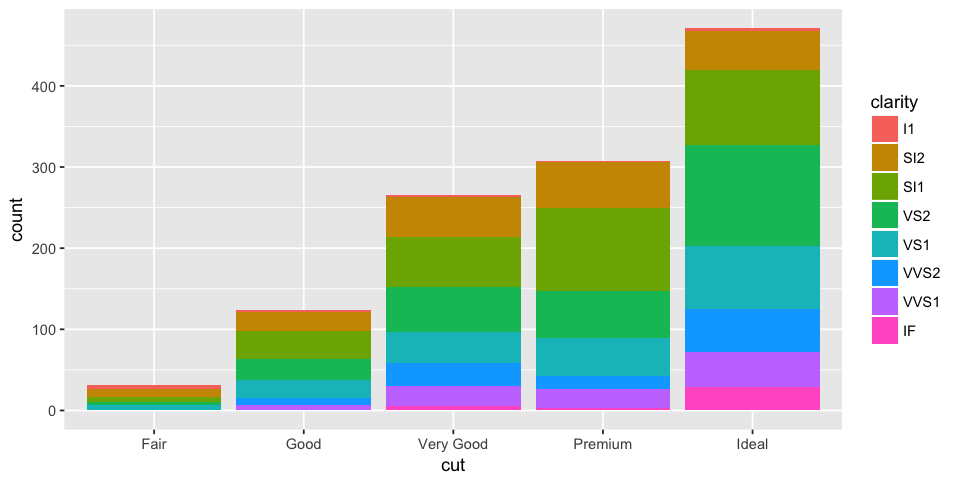

In [24]:
ggplot(dm, aes(x=cut, fill=clarity)) + 
  geom_bar(position='stack')

`position = 'identity'` can be used to plot the bar for each value of `clarity` separately. Note that this overlaps the bars, and therefore is rarely useful for bar plots.

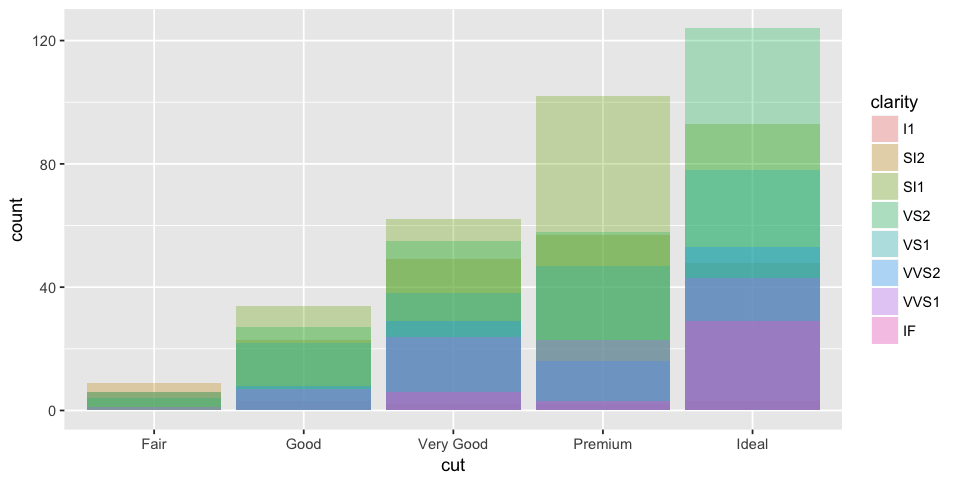

In [25]:
ggplot(dm, aes(x=cut, fill=clarity)) + 
  geom_bar(alpha=0.3, position='identity')

`position = 'fill'` stacks the bars but rescales them to all be of the same height. This is useful for comparing proportions across different groups.

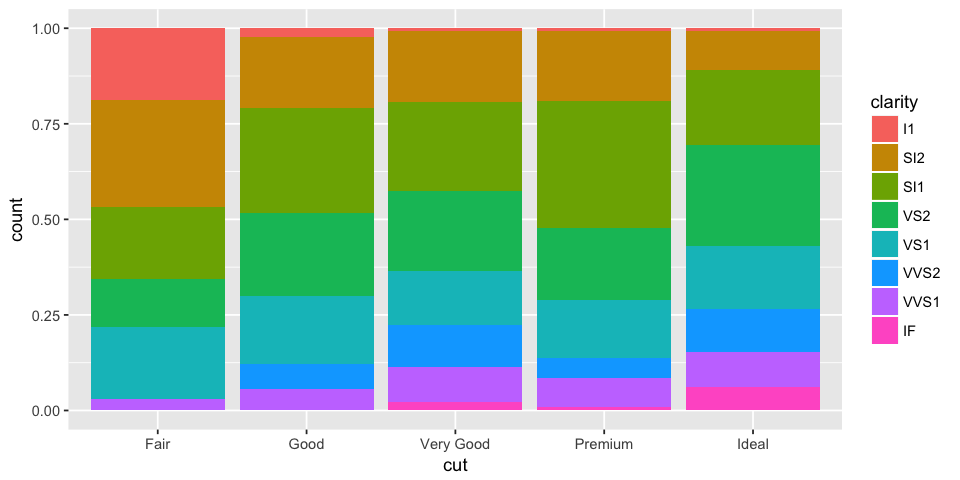

In [26]:
ggplot(dm, aes(x=cut, fill=clarity)) + 
  geom_bar(position='fill')

`position = 'dodge'` plots the bars side-by-side.

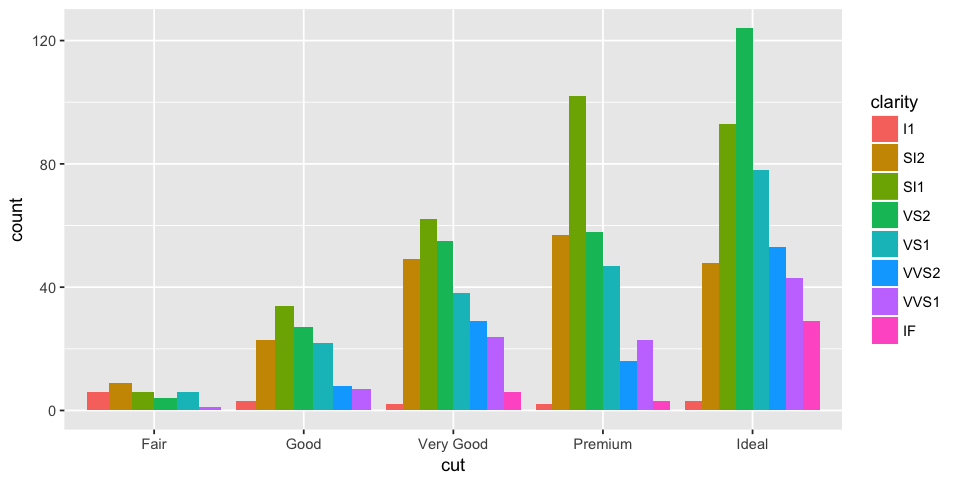

In [27]:
ggplot(dm, aes(x=cut, fill=clarity)) + 
  geom_bar(position='dodge')

A positional adjustment that can be useful for scatterplots with overlaps is the 'jitter' argument.

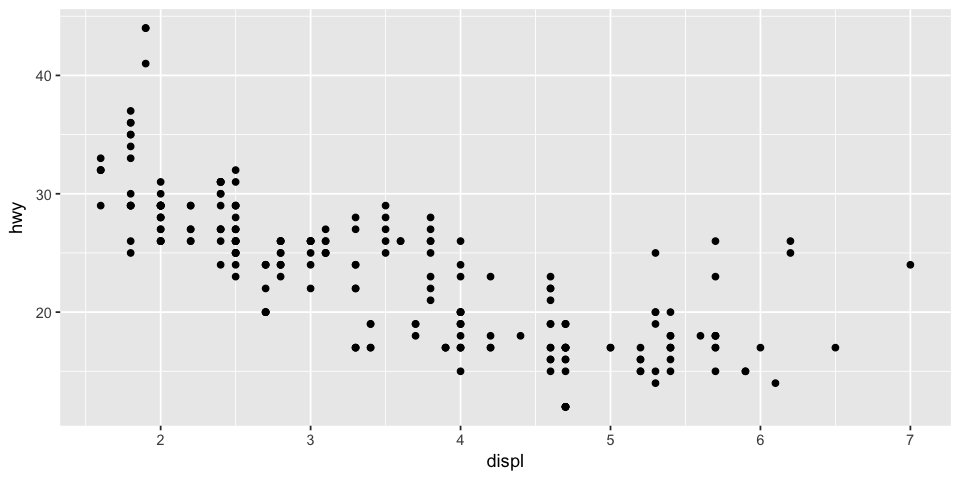

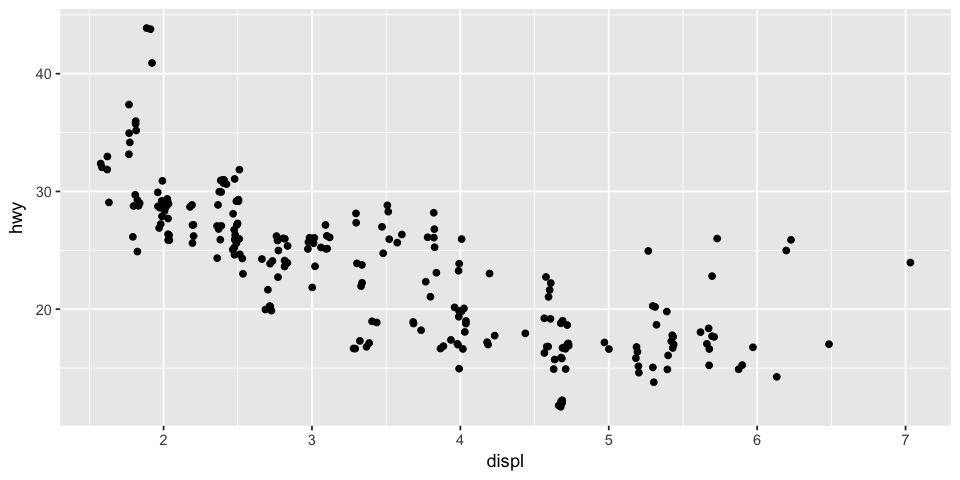

In [28]:
ggplot(mpg, aes(x=displ, y=hwy)) + 
  geom_point()

ggplot(mpg, aes(x=displ, y=hwy)) + 
  geom_point(position='jitter')  # Could also use geom_jitter()

### Exercise
1. Look up the documentation for `geom_jitter`, what arguments control the amount of "jittering" that is applied?

# dplyr for data manipulation

In [29]:
dim(dm)
head(dm)
print(dm)

[1] 1200   10

carat,cut,color,clarity,depth,table,price,x,y,z
1.63,Premium,I,SI1,61.7,58,9730,7.54,7.51,4.64
1.06,Ideal,G,VS1,61.1,57,8285,6.54,6.61,4.02
0.52,Premium,G,VS1,61.7,56,1815,5.21,5.17,3.20
0.33,Ideal,E,VVS1,61.6,55,1130,4.44,4.46,2.74
0.50,Good,F,VS2,58.8,64,1433,5.21,5.16,3.05
0.24,Very Good,E,SI1,59.9,58,571,4.06,4.10,2.44


# A tibble: 1,200 x 10
   carat cut       color clarity depth table price     x     y     z
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1 1.63  Premium   I     SI1      61.7    58  9730  7.54  7.51  4.64
 2 1.06  Ideal     G     VS1      61.1    57  8285  6.54  6.61  4.02
 3 0.52  Premium   G     VS1      61.7    56  1815  5.21  5.17  3.2 
 4 0.33  Ideal     E     VVS1     61.6    55  1130  4.44  4.46  2.74
 5 0.5   Good      F     VS2      58.8    64  1433  5.21  5.16  3.05
 6 0.24  Very Good E     SI1      59.9    58   571  4.06  4.1   2.44
 7 0.38  Premium   F     VVS1     59.2    58  1200  4.76  4.8   2.83
 8 0.570 Good      F     VS1      60      61  1801  5.35  5.38  3.22
 9 0.3   Ideal     G     IF       60.9    57   863  4.35  4.39  2.66
10 0.5   Premium   E     SI1      60.2    58  1316  5.15  5.18  3.11
# ... with 1,190 more rows


In [30]:
is.ordered(dm$cut)
levels(dm$cut)

[1] TRUE

[1] "Fair"      "Good"      "Very Good" "Premium"   "Ideal"

There are five main functions we will focus on in `dplyr`: `filter`, `arrange`, `select`, `mutate` and `summarise`. all of them have the following properties:
1. The first argument is a dataframe.
2. The subsequent arguments describe what to do with the data, using the variable names in the dataframe.
3. The result is a new data frame.

Note that the documentation for these functions can be found at https://dplyr.tidyverse.org/reference/.

## Filter
Used if you want to view or store a new dataset containing a subset of the rows of a dataset.

In [31]:
filter(dm, cut == 'Fair', color == 'J')

carat,cut,color,clarity,depth,table,price,x,y,z
2.72,Fair,J,I1,68.2,56,6870,8.46,8.43,5.76
2.00,Fair,J,I1,66.5,56,6796,7.93,7.80,5.23
1.65,Fair,J,SI1,61.6,66,5914,7.61,7.47,4.66


Remember to assign the result to a variable name if you want to store the subset for later use.

In [32]:
worst_diamonds = filter(dm, cut == 'Fair', color == 'J')
print(worst_diamonds)

# A tibble: 3 x 10
  carat cut   color clarity depth table price     x     y     z
  <dbl> <ord> <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
1  2.72 Fair  J     I1       68.2    56  6870  8.46  8.43  5.76
2  2    Fair  J     I1       66.5    56  6796  7.93  7.8   5.23
3  1.65 Fair  J     SI1      61.6    66  5914  7.61  7.47  4.66


Make sure to use `==` instead of `=`. The former is to test equality while the latter is for assignments. Recall the logic operators in R:

In [33]:
5 == 5
5 > 4
5 >= 5
5 < 6
5 <= 5
5 != 4

TRUE & TRUE
TRUE | FALSE
!(FALSE)

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

## Examples

In [34]:
a = filter(dm, color == 'D' | color == 'J') 
# filtering for rows that satisfy one or both of the conditions

b = filter(dm, color == 'D' & cut == 'Ideal') 
# filtering for rows that satisfy both conditions

c = filter(dm, xor(color == 'D', cut == 'Ideal')) 
# filtering for rows that satisfy exactly one condition

best_cuts = filter(dm, cut %in% c('Premium', 'Ideal')) 
# filtering using membership condition

good_or_better_cuts = filter(dm, cut > 'Good') 
# can do this because cut is an ordinal variable

In [35]:
head(good_or_better_cuts)

carat,cut,color,clarity,depth,table,price,x,y,z
1.63,Premium,I,SI1,61.7,58,9730,7.54,7.51,4.64
1.06,Ideal,G,VS1,61.1,57,8285,6.54,6.61,4.02
0.52,Premium,G,VS1,61.7,56,1815,5.21,5.17,3.20
0.33,Ideal,E,VVS1,61.6,55,1130,4.44,4.46,2.74
0.24,Very Good,E,SI1,59.9,58,571,4.06,4.10,2.44
0.38,Premium,F,VVS1,59.2,58,1200,4.76,4.80,2.83


In R, if you want to find if a variable's value is missing, use the `is.na()` function. NEVER check for equality against `NA`.

In [36]:
x = 4

x == NA  # Never do this
is.na(x)

[1] NA

[1] FALSE

Similarly, never put an equality condition with NA in your dplyr filter() statements

In [37]:
# create a dataframe
df = tibble(x = c(1, NA, 3), y=c('a', 'b', 'c'))
print(df)

# A tibble: 3 x 2
      x y    
  <dbl> <chr>
1     1 a    
2    NA b    
3     3 c    


In [38]:
filter(df, is.na(x) | x > 1)

x,y
NA,b
3,c


### Exercise
1. Use `filter` to output diamonds with combined `x` and `y` values greater than 17.
2. Use `filter` and `nrow` to count the number of diamonds that sold for an even price. 

## Arrange
Used to reorder rows.

In [39]:
arrange(dm, cut, color)[1:10,] 
# can be done since clarity is an ordinal variable

carat,cut,color,clarity,depth,table,price,x,y,z
1.05,Fair,D,SI2,65.4,59,3816,6.30,6.24,4.10
1.01,Fair,D,VS2,65.6,61,6176,6.21,6.16,4.06
0.71,Fair,D,SI1,65.1,59,2352,5.59,5.56,3.63
1.01,Fair,D,SI1,65.0,57,5385,6.30,6.22,4.07
1.00,Fair,E,SI2,65.1,59,3575,6.30,6.23,4.08
1.50,Fair,E,SI2,69.6,62,7560,6.88,6.79,4.76
0.62,Fair,E,VS1,58.8,67,2344,5.66,5.57,3.29
1.00,Fair,E,VS2,65.0,58,5376,6.21,6.16,4.02
0.35,Fair,F,VVS1,54.6,59,1011,4.85,4.79,2.63
1.71,Fair,F,SI2,64.9,57,8714,7.51,7.41,4.84


In [40]:
arrange(dm, desc(carat), desc(cut))[1:10,]

carat,cut,color,clarity,depth,table,price,x,y,z
2.75,Ideal,D,I1,60.9,57,13156,9.04,8.98,5.49
2.72,Fair,J,I1,68.2,56,6870,8.46,8.43,5.76
2.49,Ideal,J,SI1,63.8,54,16915,8.56,8.49,5.45
2.41,Premium,J,VS1,61.1,60,15320,8.66,8.60,5.27
2.29,Premium,J,IF,61.4,60,18594,8.49,8.45,5.20
2.28,Premium,H,SI1,59.3,58,13919,8.60,8.56,5.09
2.23,Very Good,G,I1,63.5,57,7006,8.24,8.20,5.22
2.21,Premium,F,SI1,62.1,59,16804,8.33,8.26,5.15
2.19,Premium,I,SI2,60.8,60,15032,8.34,8.38,5.08
2.19,Premium,I,SI2,62.5,58,15169,8.31,8.26,5.18


Missing values are always sorted at the end:

In [41]:
arrange(df, x)

x,y
1,a
3,c
NA,b


In [42]:
arrange(df, desc(x))

x,y
3,c
1,a
NA,b


## Select
This is used to pull out columns of a dataset.

In [43]:
names(dm)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [44]:
select(dm, carat, price)[1:5,]

carat,price
1.63,9730
1.06,8285
0.52,1815
0.33,1130
0.50,1433


In [45]:
select(dm, carat:price)[1:5,]

carat,cut,color,clarity,depth,table,price
1.63,Premium,I,SI1,61.7,58,9730
1.06,Ideal,G,VS1,61.1,57,8285
0.52,Premium,G,VS1,61.7,56,1815
0.33,Ideal,E,VVS1,61.6,55,1130
0.50,Good,F,VS2,58.8,64,1433


In [46]:
select(dm, -(carat:price))[1:5,]

x,y,z
7.54,7.51,4.64
6.54,6.61,4.02
5.21,5.17,3.20
4.44,4.46,2.74
5.21,5.16,3.05


In [47]:
select(dm, starts_with('c'))[1:5,]

carat,cut,color,clarity
1.63,Premium,I,SI1
1.06,Ideal,G,VS1
0.52,Premium,G,VS1
0.33,Ideal,E,VVS1
0.50,Good,F,VS2


In [48]:
select(dm, ends_with('t'))[1:5,]

carat,cut
1.63,Premium
1.06,Ideal
0.52,Premium
0.33,Ideal
0.50,Good


In [49]:
select(dm, contains('co'))[1:5,]

color
I
G
G
E
F


Use `rename()`, which is a variant of `select()`, to rename a column and keep all the variables that aren't explicitly mentioned:

In [50]:
rename(dm, width=x)[1:5,]

carat,cut,color,clarity,depth,table,price,width,y,z
1.63,Premium,I,SI1,61.7,58,9730,7.54,7.51,4.64
1.06,Ideal,G,VS1,61.1,57,8285,6.54,6.61,4.02
0.52,Premium,G,VS1,61.7,56,1815,5.21,5.17,3.20
0.33,Ideal,E,VVS1,61.6,55,1130,4.44,4.46,2.74
0.50,Good,F,VS2,58.8,64,1433,5.21,5.16,3.05


In [51]:
select(dm, width=x)[1:5,]

width
7.54
6.54
5.21
4.44
5.21


In [52]:
select(dm,  everything(), width=x)[1:5,]

carat,cut,color,clarity,depth,table,price,width,y,z
1.63,Premium,I,SI1,61.7,58,9730,7.54,7.51,4.64
1.06,Ideal,G,VS1,61.1,57,8285,6.54,6.61,4.02
0.52,Premium,G,VS1,61.7,56,1815,5.21,5.17,3.20
0.33,Ideal,E,VVS1,61.6,55,1130,4.44,4.46,2.74
0.50,Good,F,VS2,58.8,64,1433,5.21,5.16,3.05


The `everything()` helper function is often useful if you want to keep all the variables while making changes to some. For instance, if you want to move variables around.

In [53]:
select(dm, price, carat, everything())[1:5,]

price,carat,cut,color,clarity,depth,table,x,y,z
9730,1.63,Premium,I,SI1,61.7,58,7.54,7.51,4.64
8285,1.06,Ideal,G,VS1,61.1,57,6.54,6.61,4.02
1815,0.52,Premium,G,VS1,61.7,56,5.21,5.17,3.20
1130,0.33,Ideal,E,VVS1,61.6,55,4.44,4.46,2.74
1433,0.50,Good,F,VS2,58.8,64,5.21,5.16,3.05


  ### Exercise:
1. Write code that wil have `price` as the first column and the columns ending with the letter 'y' as the following columns. Output the first 20 rows of such a datset.


### Mutate
Create a computed column.

In [54]:
dm_dim = select(dm, -(carat:price))
head(dm_dim)

x,y,z
7.54,7.51,4.64
6.54,6.61,4.02
5.21,5.17,3.20
4.44,4.46,2.74
5.21,5.16,3.05
4.06,4.10,2.44


In [55]:
mutate(dm_dim, volume = x*y*z)[1:5,]
# dm_dim$volume = dm_dim$x * dm_dim$y * dm_dim$z  # equivalent

x,y,z,volume
7.54,7.51,4.64,262.74186
6.54,6.61,4.02,173.78219
5.21,5.17,3.20,86.19424
4.44,4.46,2.74,54.25858
5.21,5.16,3.05,81.99498


If you only want to keep the new variables, use `transmute()`.

In [56]:
transmute(dm_dim, volume = x*y*z)[1:5,]

volume
262.74186
173.78219
86.19424
54.25858
81.99498


Read Section 5.5.1 in the book for some specific functions.

### Exercise
1. Add a new column to `dm` that converts the US dollar prices in `price` to Korean Won and rounds to the nearest thousand. Today's exchange rate is 1 USD = 1,120.67 WON.

## Summarize
Generally used in concert with the `group_by()` function to output summaries by group.

In [57]:
dm_by_color = group_by(dm, color)
group_vars(dm_by_color)
summarize(dm_by_color, avg_price=mean(price, na.rm=TRUE))

[1] "color"

color,avg_price
D,3298.628
E,3074.355
F,3553.600
G,3675.244
H,4823.753
I,4837.172
J,4866.476


In [58]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [59]:
mpg2 = mpg
mpg2 = mutate(mpg2, year=as.factor(year))
# mpg2$year = as.factor(mpg2$year)

mpg2 = mutate(mpg2, manual=(grepl('manual', trans)))
head(mpg2)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,manual
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,FALSE
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,TRUE
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,TRUE
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,FALSE
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,FALSE
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,TRUE


In [60]:
mpg2_by_maker_yr = group_by(mpg2, manufacturer, year)
hwy_summary = summarize(mpg2_by_maker_yr,
                        count = n(),
                        hwy = mean(hwy, na.rm=TRUE),
                        cty = mean(cty, na.rm=TRUE))
head(hwy_summary)
print(group_vars(mpg2_by_maker_yr))
print(group_vars(hwy_summary))

manufacturer,year,count,hwy,cty
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238


[1] "manufacturer" "year"        
[1] "manufacturer"


In [61]:
hwy_summary_ag = filter(hwy_summary, str_detect(manufacturer, '^[a-g]'))
# hwy_summary_ag = filter(hwy_summary, substring(manufacturer,1,1) %in% c('a','b','c','d','e','f','g'))
hwy_summary_ag

manufacturer,year,count,hwy,cty
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000


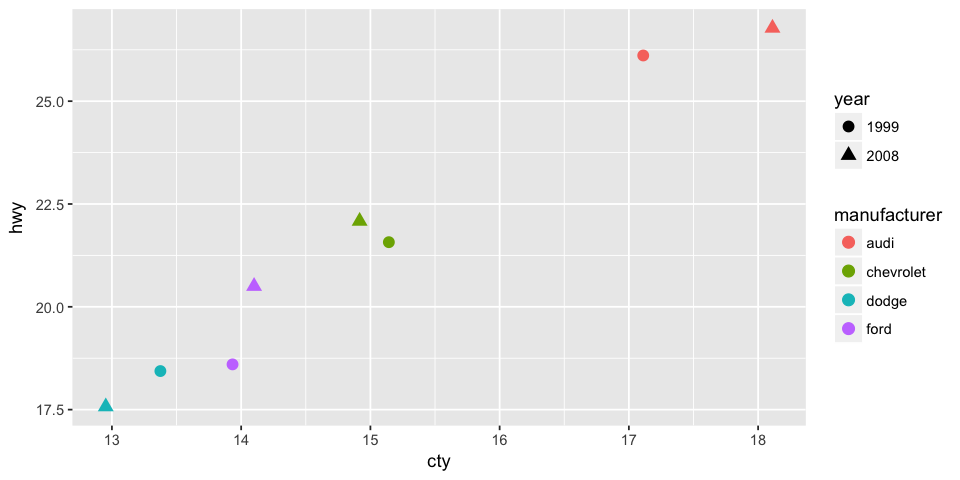

In [62]:
ggplot(hwy_summary_ag, aes(x=cty, y=hwy, color=manufacturer, shape=year)) + 
    geom_point(size=3)

## Pipes
`tidyverse` provides shortcuts for performing multiple operators on a dataset in the form of pipes.

In [63]:
mpg2_by_maker_yr = group_by(mpg2, manufacturer, year)
hwy_summary = summarize(mpg2_by_maker_yr,
                        count = n(),
                        hwy = mean(hwy, na.rm=TRUE),
                        cty = mean(cty, na.rm=TRUE))
hwy_summary_ag = filter(hwy_summary, str_detect(manufacturer, '^[a-g]'))

hwy_summary_ag2 = mpg2 %>% 
    ...

In [64]:
hwy_summary_ag
hwy_summary_ag2

manufacturer,year,count,hwy,cty
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000


[1] "manufacturer"